In [86]:
import pandas as pd

resultados_exames = pd.read_csv('exames.csv')

In [87]:
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [88]:
from sklearn.model_selection import train_test_split
from numpy import random

In [89]:
SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns=['diagnostico', 'id', 'exame_33'], axis=1)
diagnostico = resultados_exames['diagnostico']

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnostico, test_size=0.3)

In [90]:
from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators=100)

classificador.fit(treino_x, treino_y)

classificador.score(teste_x, teste_y)

0.9239766081871345

In [91]:
from sklearn.dummy import DummyClassifier

In [92]:
SEED = 123143
random.seed(SEED)

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(treino_x, treino_y)
dummy.score(teste_x, teste_y)

0.6666666666666666

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [94]:
scaler = StandardScaler()
valores_exames_after_scaler = scaler.fit_transform(valores_exames)

valores_exames_after_scaler = pd.DataFrame(data=valores_exames_after_scaler, columns=valores_exames.keys())


In [95]:
def plot_grafico_violino(valores, inicio, fim):
    plt.figure(figsize=(15, 10))
    plt.xticks(rotation=90)

    dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis=1)
    dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')

    sns.violinplot(x='exames', y='valores', data=dados_plot, hue='diagnostico', split=True)

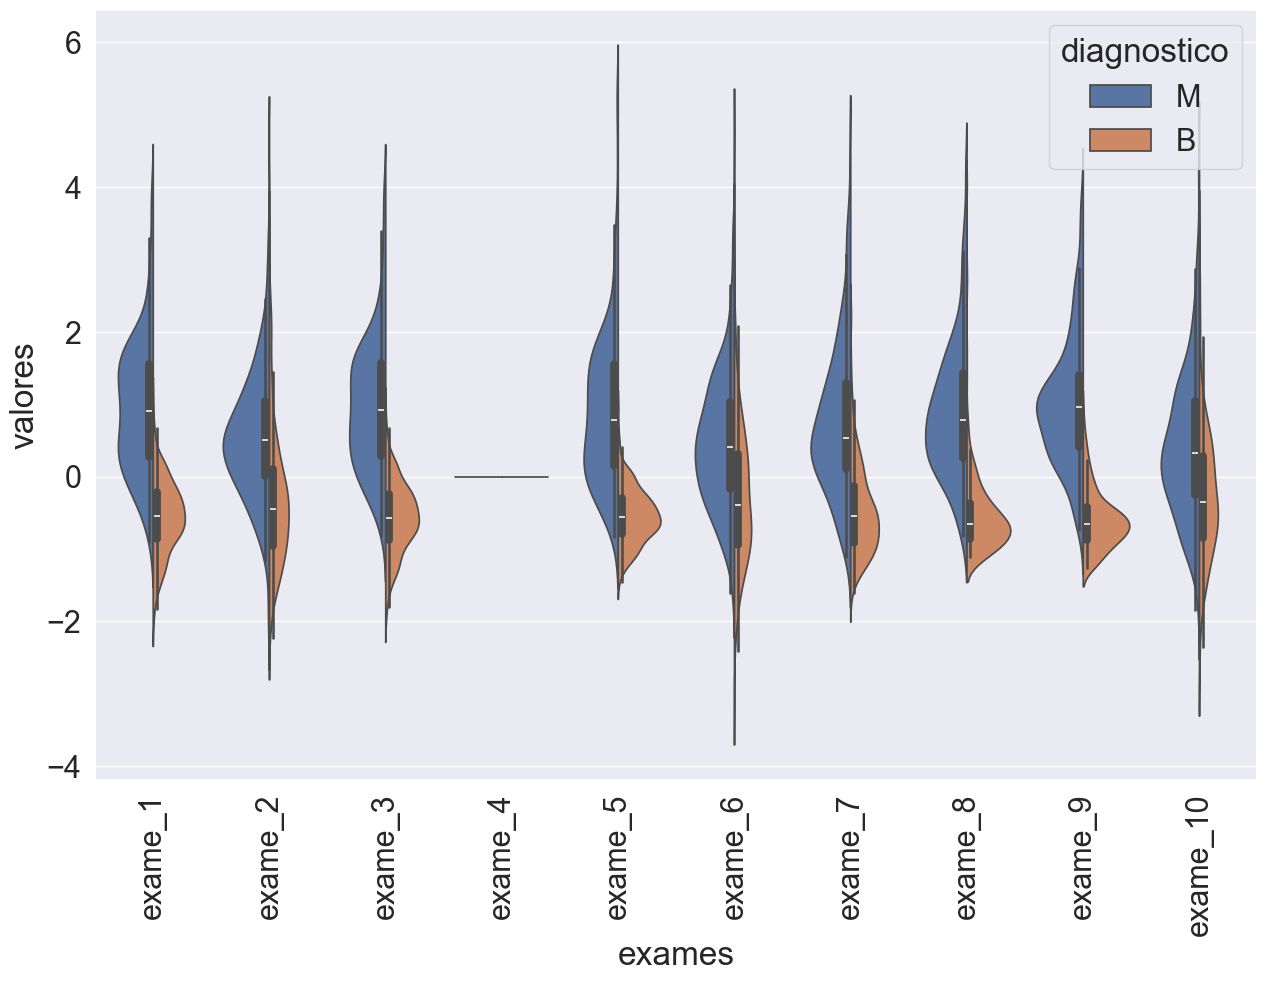

In [96]:
plot_grafico_violino(valores_exames_after_scaler, 0, 10)

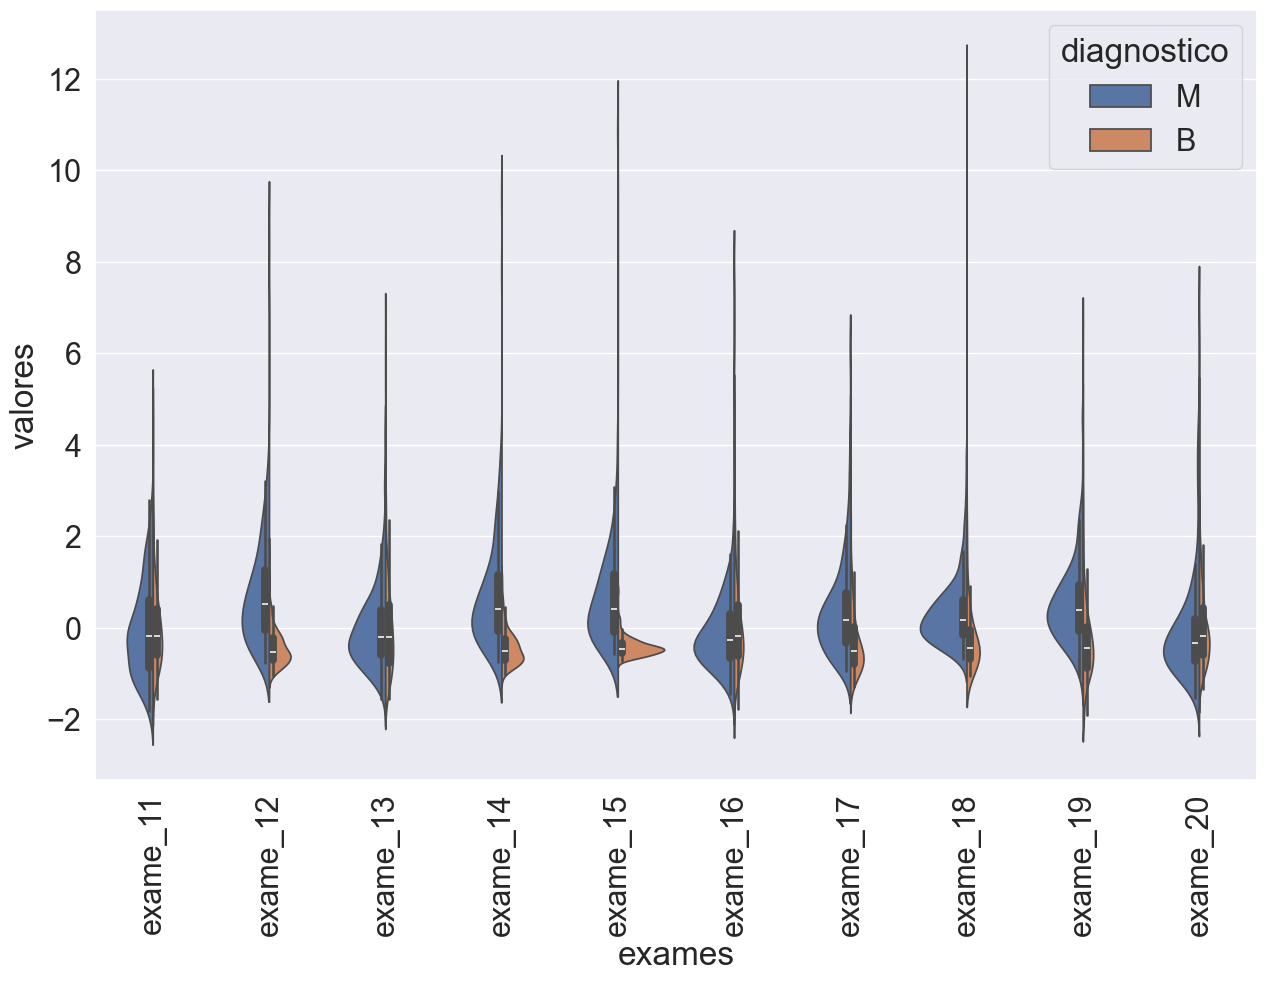

In [97]:
plot_grafico_violino(valores_exames_after_scaler, 10, 20)

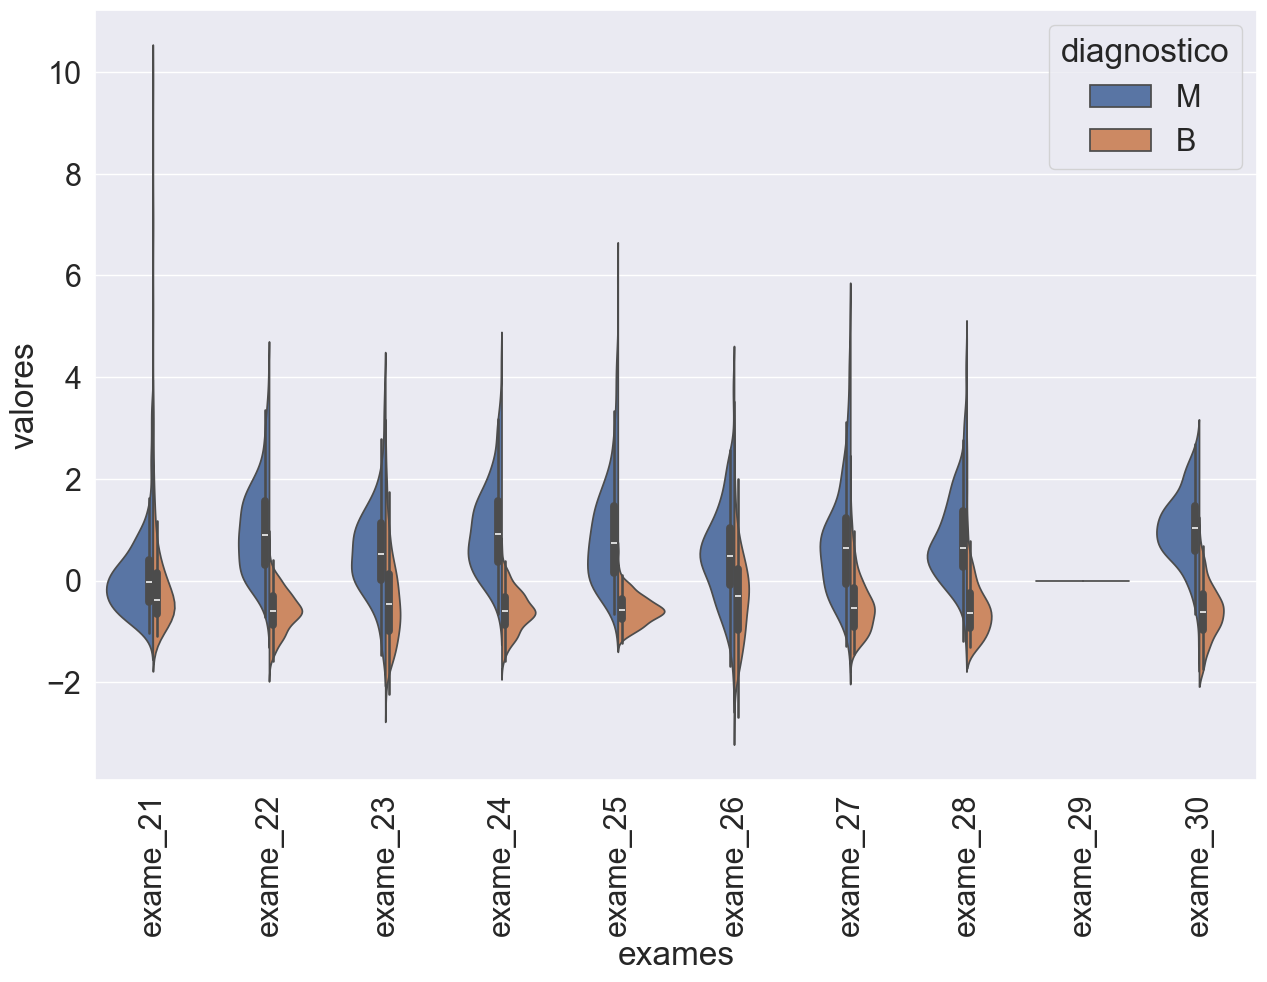

In [98]:
plot_grafico_violino(valores_exames_after_scaler, 20, 30)

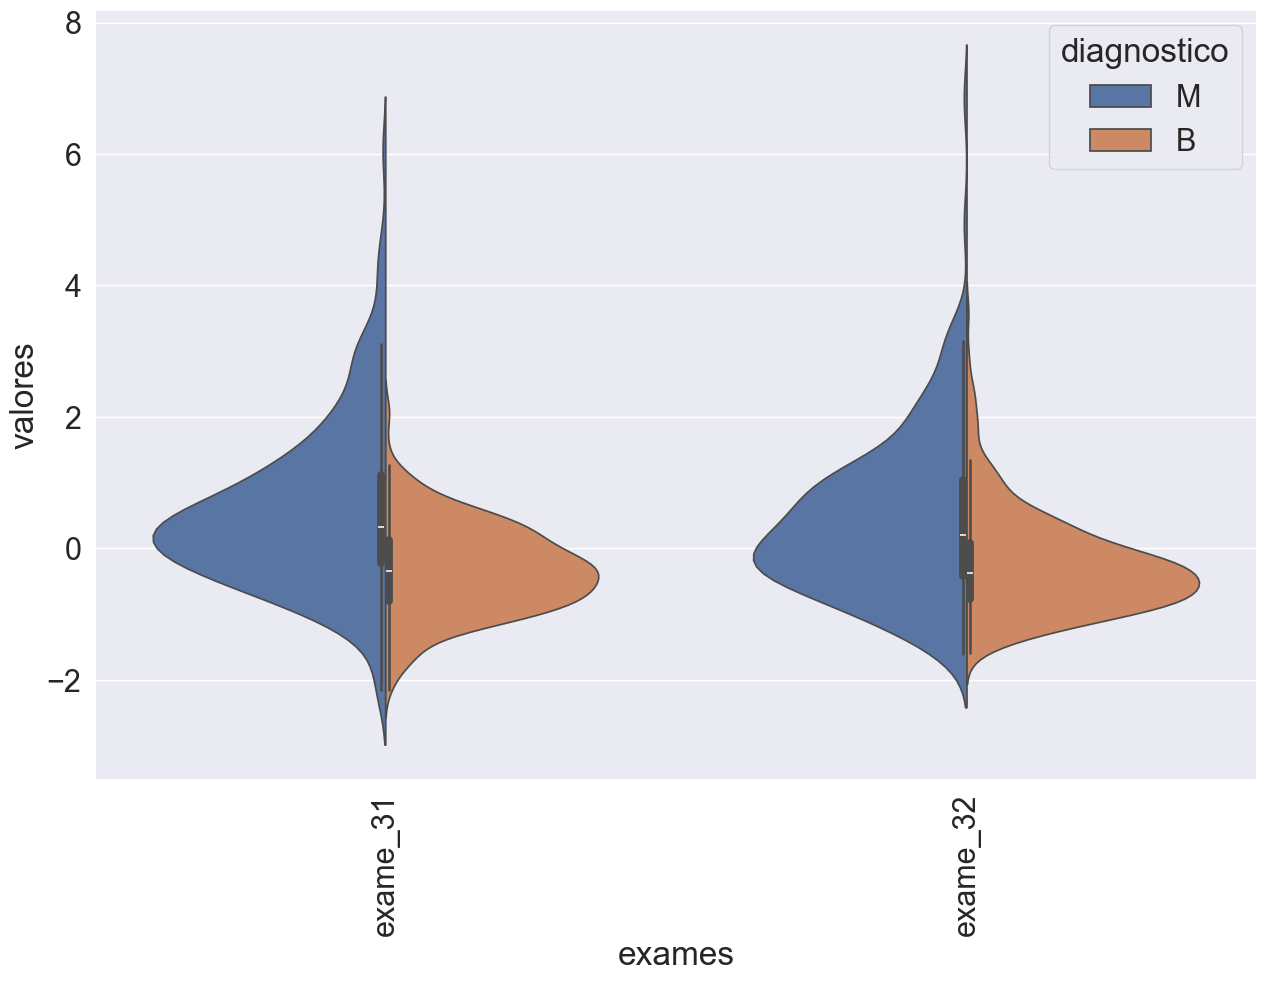

In [99]:
plot_grafico_violino(valores_exames_after_scaler, 30, 33)

In [100]:
valore_exames_v3 = valores_exames_after_scaler.drop(['exame_29', 'exame_4'], axis=1)

In [101]:
def classificar(valores):
    SEED = 123143
    random.seed(SEED)

    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size = 0.3)

    classificador = RandomForestClassifier(n_estimators = 100)
    classificador.fit(treino_x, treino_y)
    
    return classificador.score(teste_x, teste_y)

In [102]:
classificar(valore_exames_v3)

0.9181286549707602

<Axes: >

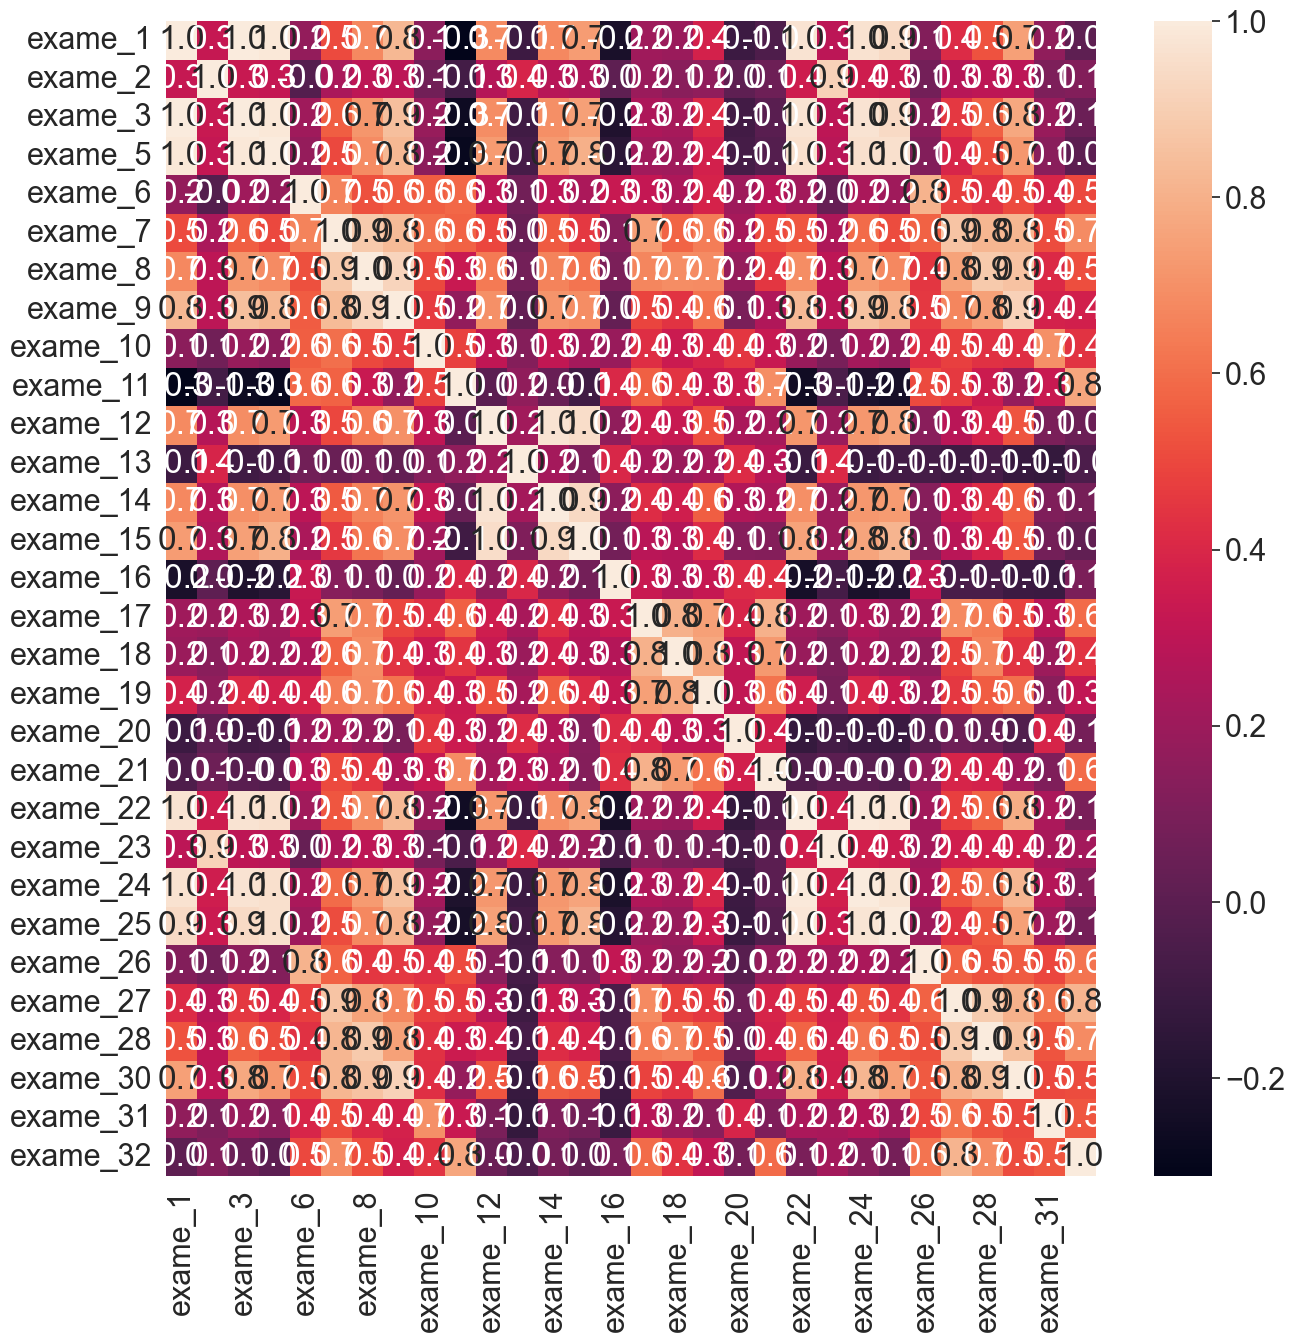

In [103]:
correlacoes = valore_exames_v3.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlacoes, annot=True, fmt=".1f")

In [104]:
correlacoes_v1 = correlacoes[correlacoes > 0.99]

correlacoes_v2 = correlacoes_v1.sum()

correlacoes_v3 = correlacoes_v2[correlacoes_v2 > 1]

In [105]:
correlacoes_v3

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [106]:
valore_exames_v4 = valore_exames_v3.drop(columns=['exame_3', 'exame_24'])

In [107]:
classificar(valore_exames_v4)

0.9298245614035088

In [108]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selecionar_kmelhores = SelectKBest(chi2, k=5)
selecionar_kmelhores

SelectKBest(k=5, score_func=<function chi2 at 0x00000133AB2AA520>)

In [109]:
valores_exames_v6 = valores_exames.drop(columns=['exame_3', 'exame_4', 'exame_24', 'exame_29'])

In [110]:
SEED = 1234

random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3)
selecionar_kmelhores.fit(treino_x, treino_y)

treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [111]:
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, treino_y)
classificador.score(teste_kbest, teste_y)

0.9239766081871345

In [112]:
from sklearn.metrics import confusion_matrix

In [113]:
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))

[Text(0.5, 48.249999999999986, 'Predição'),
 Text(125.74999999999999, 0.5, 'Real')]

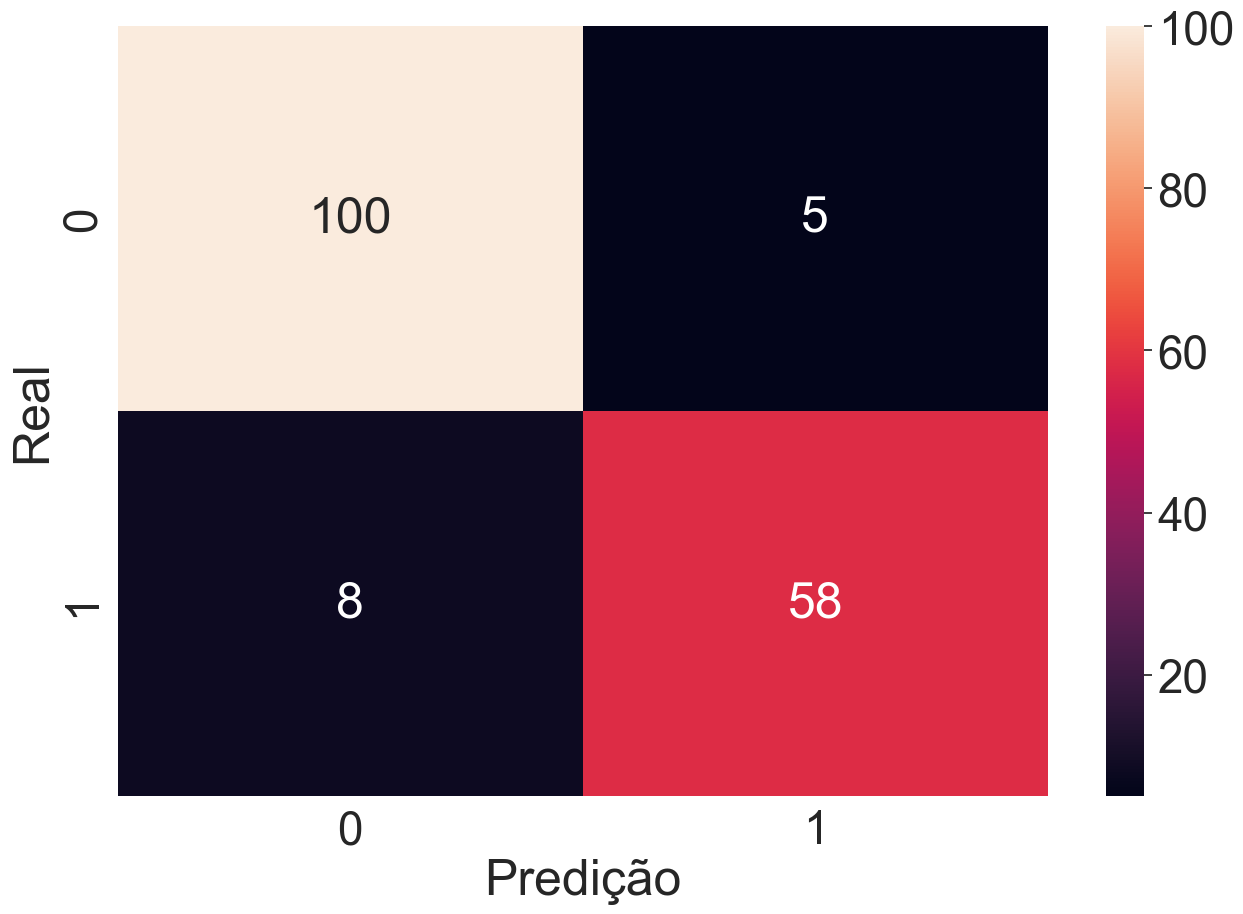

In [114]:
plt.figure(figsize=(15,10))
sns.set(font_scale=3)
sns.heatmap(matriz_confusao, annot=True, fmt="d").set(xlabel="Predição", ylabel="Real")

In [115]:
from sklearn.feature_selection import RFE

Resultado da classificação 90.06%


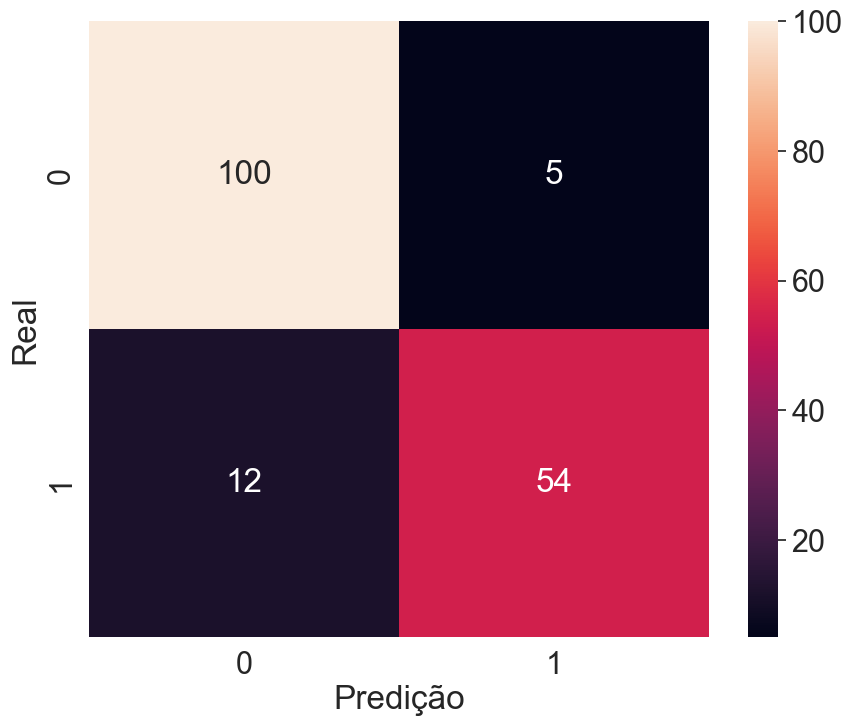

In [116]:
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                       diagnostico,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)
classificador.fit(treino_x, treino_y)


selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfe, teste_y)* 100))


In [117]:
from sklearn.feature_selection import RFECV

Resultado da classificação 92.98%


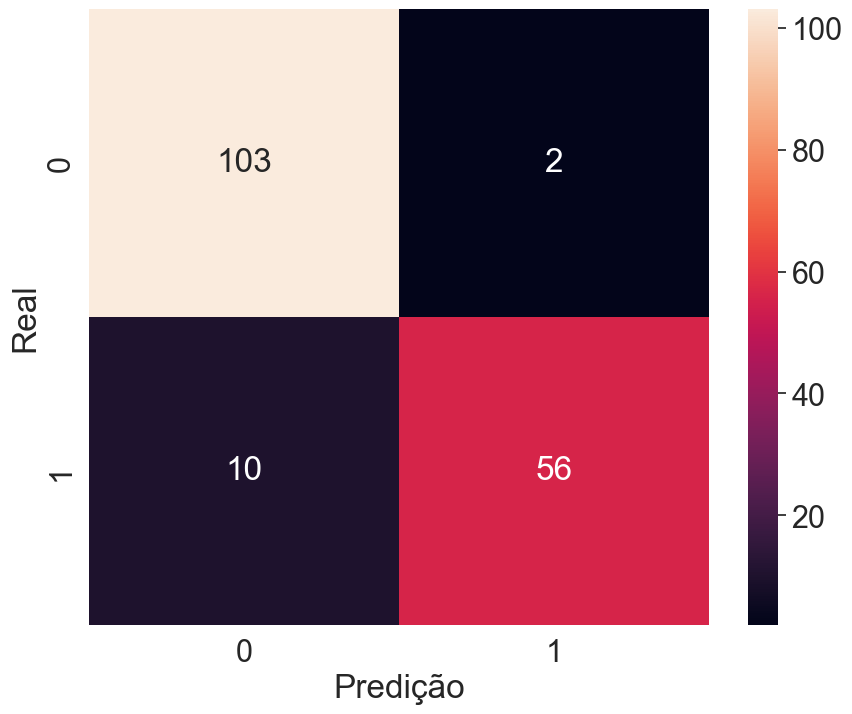

In [118]:
from sklearn.feature_selection import RFECV

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                       diagnostico,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)
classificador.fit(treino_x, treino_y)


selecionador_rfecv = RFECV(estimator = classificador, cv = 5, scoring = "accuracy", step = 1)
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)
classificador.fit(treino_rfecv, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfecv, teste_y)* 100))


In [119]:
selecionador_rfecv.n_features_

26

In [120]:
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

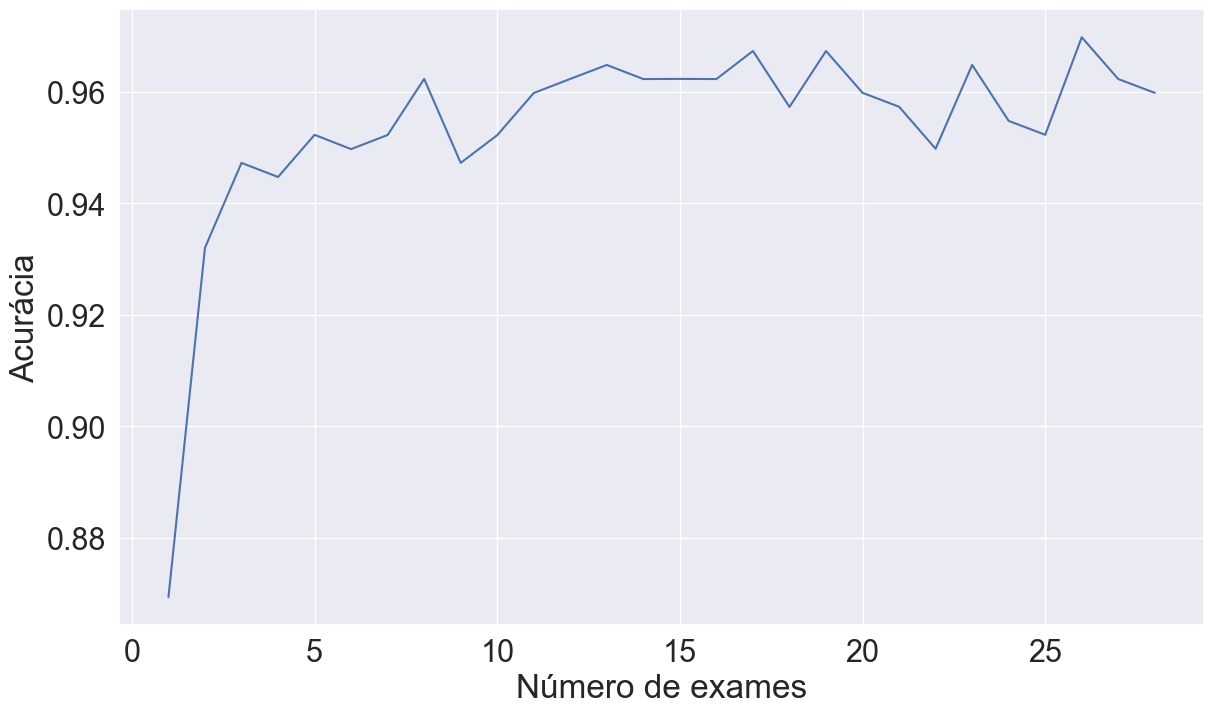

In [121]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")

plt.plot(range(1, len(selecionador_rfecv.cv_results_["mean_test_score"]) + 1), selecionador_rfecv.cv_results_["mean_test_score"])
plt.show

Resultado da classificação 87.13%


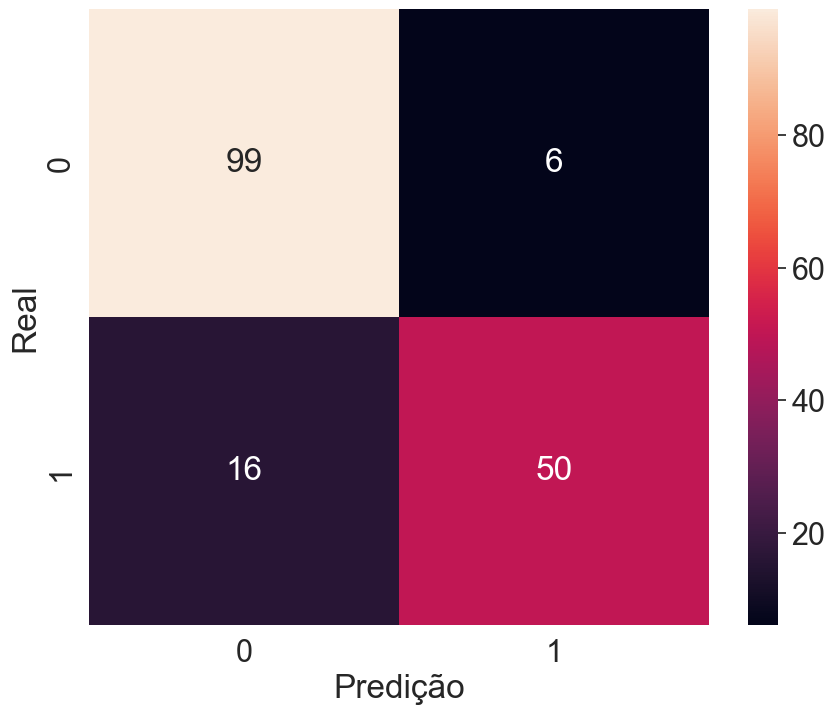

In [122]:
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6,
                                                       diagnostico,
                                                       test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state = 1234)
classificador.fit(treino_x, treino_y)


selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 2, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfe, teste_y)* 100))

In [123]:
valores_exames_v7 = selecionador_rfe.transform(valores_exames_v6)
valores_exames_v7.shape

(569, 2)

<Axes: >

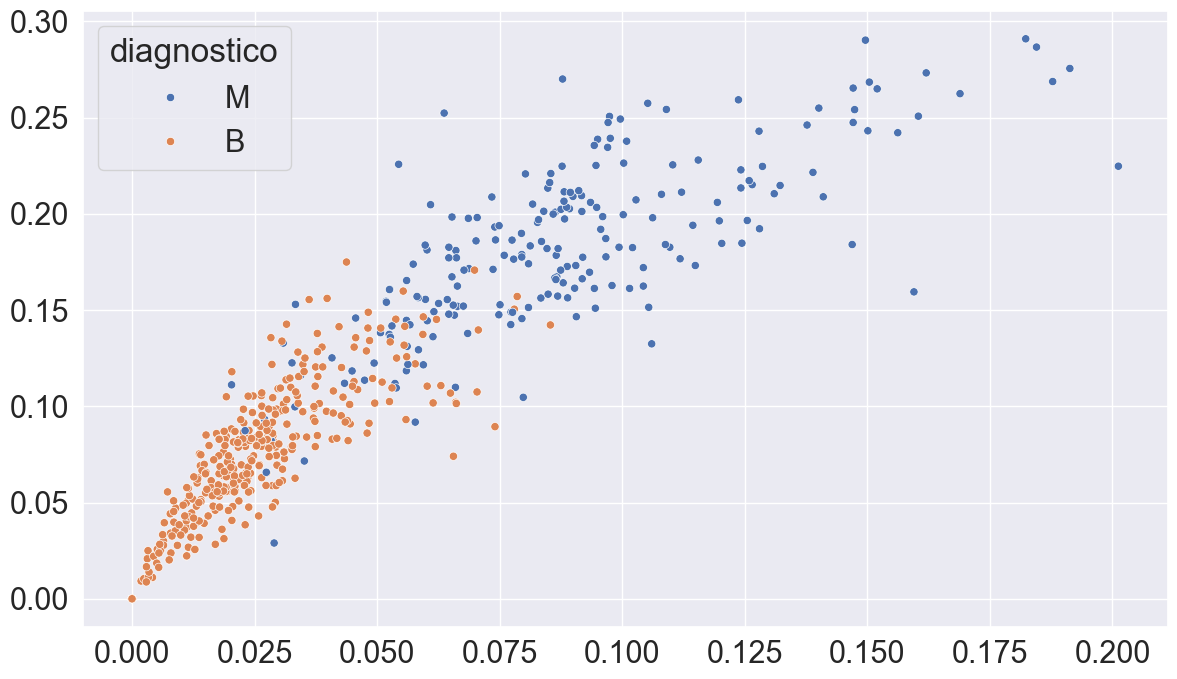

In [124]:
import seaborn as sns 

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v7[:,0], y = valores_exames_v7[:,1], hue = diagnostico)

In [125]:
from sklearn.decomposition import PCA

In [126]:
valores_exames_v3 = valores_exames_after_scaler.drop(columns=["exame_29", "exame_4"])
valores_exames_v5 = valores_exames_v3.drop(columns=["exame_3", "exame_24"])

<Axes: >

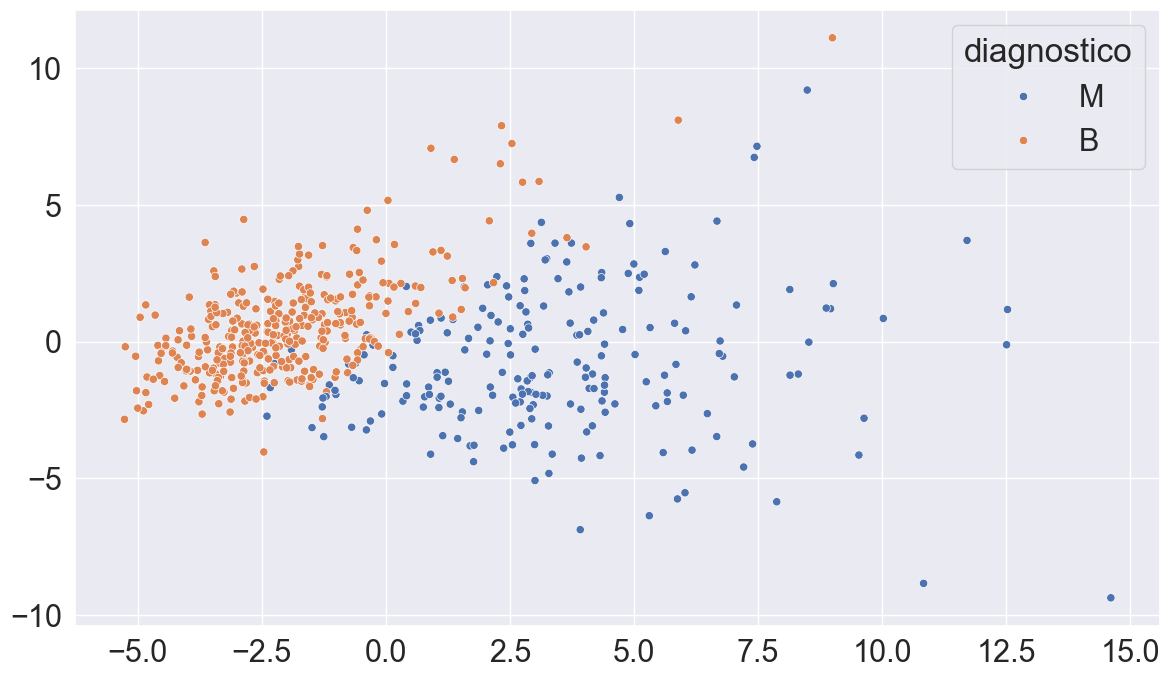

In [127]:
pca = PCA(n_components=2)

valores_exames_v8 = pca.fit_transform(valores_exames_v5)

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v8[:,0], y = valores_exames_v8[:,1], hue = diagnostico)

<Axes: >

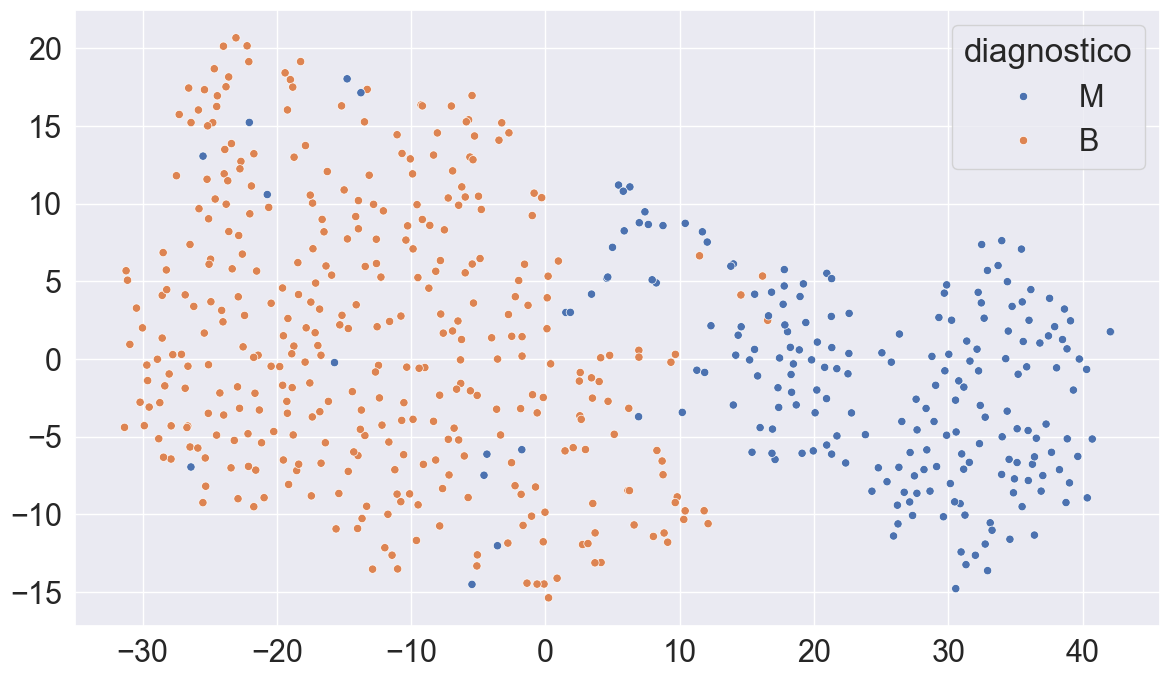

In [128]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v9[:,0], y = valores_exames_v9[:,1], hue = diagnostico)